# Practice Project - 4

# Abalone Case Study

<b>Problem Statement:</b>

The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

<b>Attribute Information</b>

Given is the attribute name, attribute type, the measurement unit and a brief description. The number of rings is the value to predict. 

Name / Data Type / Measurement Unit / Description
-----------------------------
Sex / nominal / -- / M, F, and I (infant)          
Length / continuous / mm / Longest shell measurement         
Diameter / continuous / mm / perpendicular to length           
Height / continuous / mm / with meat in shell          
Whole weight / continuous / grams / whole abalone        
Shucked weight / continuous / grams / weight of meat        
Viscera weight / continuous / grams / gut weight (after bleeding)        
Shell weight / continuous / grams / after being dried          
Rings / integer / -- / +1.5 gives the age in years. 

You have to predict the rings of each abalone which will lead us to the age of that abalone.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("abalone.csv")
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [3]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
df.tail()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10
4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,12


In [5]:
df.sample(3)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
1538,I,0.355,0.270,0.075,0.1775,0.0790,0.0315,0.054,6
1233,I,0.370,0.280,0.085,0.2170,0.1095,0.0350,0.062,6
3055,F,0.610,0.495,0.160,1.0890,0.4690,0.1980,0.384,11


In [6]:
type(df.columns)

pandas.core.indexes.base.Index

In [7]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [8]:
df.isnull()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
4172,False,False,False,False,False,False,False,False,False
4173,False,False,False,False,False,False,False,False,False
4174,False,False,False,False,False,False,False,False,False
4175,False,False,False,False,False,False,False,False,False


In [9]:
# Here, we get the total number of null values present in any particular column

df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [10]:
# Here, we are finding out the total number of null values in our complete dataset

df.isnull().sum().sum()

0

In [11]:
# There are no duplicate columns in our dataset

df.drop_duplicates()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
# Here, we are using Label encoding technique, and changing the values of column "Sex"
# Female is encoded as 0
# Infant is encoded as 1
# Male is encoded as 2


lencode = LabelEncoder()

df['Sex'] = lencode.fit_transform(df['Sex'])
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


<AxesSubplot:xlabel='Sex', ylabel='count'>

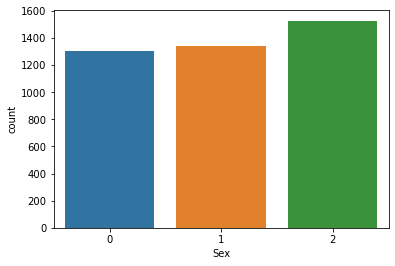

In [14]:
# Now, let's visualize the number of males, females and infants, with the help of countplot

sns.countplot(df.Sex)

In [15]:
df.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.052909,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.822240,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [16]:
df.describe()[1:]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
mean,1.052909,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.822240,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [17]:
df.describe()[1:].transpose()

,mean,std,min,25%,50%,75%,max
Sex,1.052909,0.822240,0.0000,0.0000,1.0000,2.000,2.0000
Length,0.523992,0.120093,0.0750,0.4500,0.5450,0.615,0.8150
Diameter,0.407881,0.099240,0.0550,0.3500,0.4250,0.480,0.6500
Height,0.139516,0.041827,0.0000,0.1150,0.1400,0.165,1.1300
Whole weight,0.828742,0.490389,0.0020,0.4415,0.7995,1.153,2.8255
Shucked weight,0.359367,0.221963,0.0010,0.1860,0.3360,0.502,1.4880
Viscera weight,0.180594,0.109614,0.0005,0.0935,0.1710,0.253,0.7600
Shell weight,0.238831,0.139203,0.0015,0.1300,0.2340,0.329,1.0050
Rings,9.933684,3.224169,1.0000,8.0000,9.0000,11.000,29.0000


In [18]:
round(df.describe()[1:].transpose(),2)

,mean,std,min,25%,50%,75%,max
Sex,1.05,0.82,0.00,0.00,1.00,2.00,2.00
Length,0.52,0.12,0.08,0.45,0.55,0.62,0.82
Diameter,0.41,0.10,0.06,0.35,0.42,0.48,0.65
Height,0.14,0.04,0.00,0.12,0.14,0.16,1.13
Whole weight,0.83,0.49,0.00,0.44,0.80,1.15,2.83
Shucked weight,0.36,0.22,0.00,0.19,0.34,0.50,1.49
Viscera weight,0.18,0.11,0.00,0.09,0.17,0.25,0.76
Shell weight,0.24,0.14,0.00,0.13,0.23,0.33,1.00
Rings,9.93,3.22,1.00,8.00,9.00,11.00,29.00


In [19]:
df.skew()

Sex              -0.098155
Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

<b>Outcome of skewness:</b>

Skewness threshold is taken as +/-0.65

Columns which are having skewness:
* Sex          
* Length      
* Diameter       
* Height          
* Shucked weight
* Rings

# Normal Distribution Curve

<AxesSubplot:xlabel='Sex', ylabel='Density'>

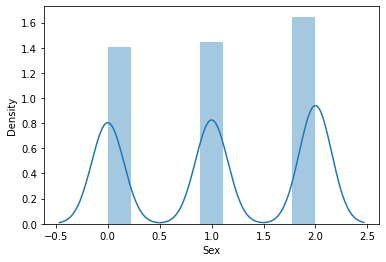

In [20]:
sns.distplot(df["Sex"])

<AxesSubplot:xlabel='Length', ylabel='Density'>

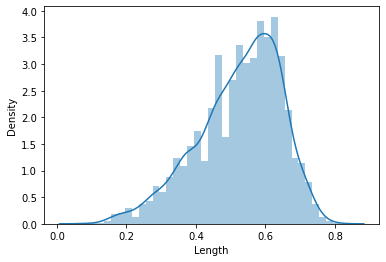

In [21]:
sns.distplot(df["Length"])

<AxesSubplot:xlabel='Diameter', ylabel='Density'>

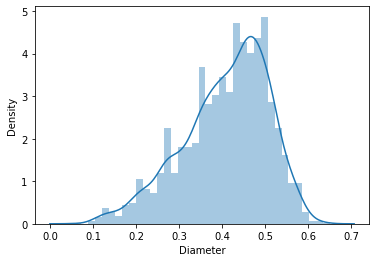

In [22]:
sns.distplot(df["Diameter"])

<AxesSubplot:xlabel='Height', ylabel='Density'>

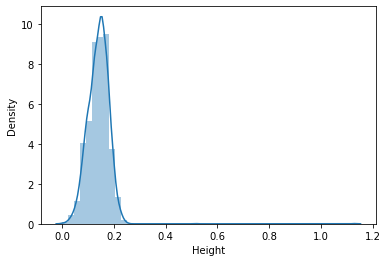

In [23]:
sns.distplot(df["Height"])

<AxesSubplot:xlabel='Whole weight', ylabel='Density'>

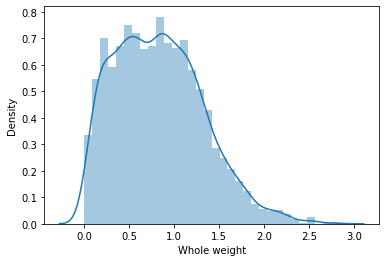

In [24]:
sns.distplot(df["Whole weight"])

<AxesSubplot:xlabel='Shucked weight', ylabel='Density'>

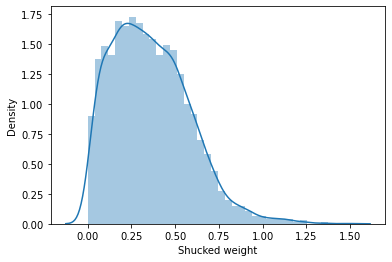

In [25]:
sns.distplot(df["Shucked weight"])

<AxesSubplot:xlabel='Viscera weight', ylabel='Density'>

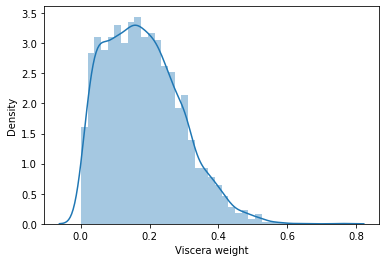

In [26]:
sns.distplot(df["Viscera weight"])

<AxesSubplot:xlabel='Shell weight', ylabel='Density'>

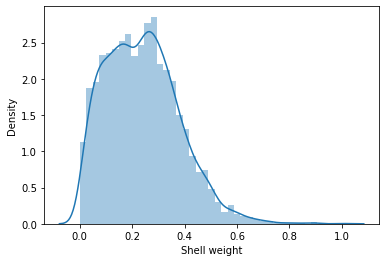

In [27]:
sns.distplot(df["Shell weight"])

# Data Cleaning

In [28]:
df.corr()['Rings'].sort_values()

Sex              -0.034627
Shucked weight    0.420884
Viscera weight    0.503819
Whole weight      0.540390
Length            0.556720
Height            0.557467
Diameter          0.574660
Shell weight      0.627574
Rings             1.000000
Name: Rings, dtype: float64

<b>As we can see, the column "Sex" has very low correlation with the column "Rings". So let's drop it.</b>

In [29]:
delete = pd.DataFrame([["-0.034627", "Sex", "No", "Alot"]],
                     columns = ["Correlation with Target", "Column Name", "Normalized", "Outliers"])

delete

,Correlation with Target,Column Name,Normalized,Outliers
0,-0.034627,Sex,No,Alot


In [30]:
df = df.drop("Sex", axis=1)
df

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


# Removing Outliers

In [31]:
from scipy.stats import zscore

In [32]:
zscore(df)

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217,1.571544
1,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987,-0.910013
2,0.050033,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139,-0.289624
3,-0.699476,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294,0.020571
4,-1.615544,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757,-0.910013
...,...,...,...,...,...,...,...,...
4172,0.341509,0.424464,0.609334,0.118813,0.047908,0.532900,0.073062,0.330765
4173,0.549706,0.323686,-0.107991,0.279929,0.358808,0.309362,0.155685,0.020571
4174,0.632985,0.676409,1.565767,0.708212,0.748559,0.975413,0.496955,-0.289624
4175,0.841182,0.777187,0.250672,0.541998,0.773341,0.733627,0.410739,0.020571


In [33]:
np.abs(zscore(df))

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.574558,0.432149,1.064424,0.641898,0.607685,0.726212,0.638217,1.571544
1,1.448986,1.439929,1.183978,1.230277,1.170910,1.205221,1.212987,0.910013
2,0.050033,0.122130,0.107991,0.309469,0.463500,0.356690,0.207139,0.289624
3,0.699476,0.432149,0.347099,0.637819,0.648238,0.607600,0.602294,0.020571
4,1.615544,1.540707,1.423087,1.272086,1.215968,1.287337,1.320757,0.910013
...,...,...,...,...,...,...,...,...
4172,0.341509,0.424464,0.609334,0.118813,0.047908,0.532900,0.073062,0.330765
4173,0.549706,0.323686,0.107991,0.279929,0.358808,0.309362,0.155685,0.020571
4174,0.632985,0.676409,1.565767,0.708212,0.748559,0.975413,0.496955,0.289624
4175,0.841182,0.777187,0.250672,0.541998,0.773341,0.733627,0.410739,0.020571


In [34]:
import numpy as np

z = np.abs(zscore(df))
z.shape

(4177, 8)

In [35]:
type(z)

pandas.core.frame.DataFrame

In [36]:
# Here, we are getting the index numbers of the datapoints, where zscore is greater than 3

np.where(z>3)

(array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  165,  166,
         166,  167,  168,  170,  181,  232,  236,  236,  236,  237,  237,
         238,  238,  239,  270,  275,  277,  278,  294,  310,  313,  314,
         334,  351,  355,  358,  358,  362,  375,  416,  417,  428,  431,
         433,  469,  478,  480,  501,  526,  526,  530,  572,  628,  673,
         674,  675,  678,  694,  696,  696,  719,  719,  720,  720,  744,
         754,  756,  811,  891,  891,  891, 1048, 1051, 1051, 1052, 1193,
        1197, 1199, 1202, 1204, 1206, 1206, 1207, 1207, 1207, 1207, 1209,
        1209, 1257, 1417, 1417, 1418, 1422, 1426, 1427, 1427, 1427, 1428,
        1429, 1429, 1528, 1754, 1756, 1757, 1759, 1761, 1762, 1762, 1762,
        1763, 1763, 1763, 1821, 1982, 1986, 1987, 1987, 2051, 2090, 2108,
        2108, 2114, 2114, 2157, 2161, 2176, 2180, 2199, 2201, 2208, 2209,
        2274, 2275, 2305, 2334, 2334, 2334, 2335, 2344, 2358, 2368, 2381,
        2436, 2459, 2471, 2544, 2623, 

In [37]:
len(np.where(z>3)[0])

200

In [38]:
df_new = df[(z<3).all(axis=1)]

In [39]:
print("Old DataFrame", df.shape)
print("New DataFrame", df_new.shape)
print("total_dropped_rows", df.shape[0] - df_new.shape[0])

Old DataFrame (4177, 8)
New DataFrame (4027, 8)
total_dropped_rows 150


# Percentage data loss

In [40]:
loss_percent = (4177-4027)/4177*100
print(loss_percent, '%')

3.5910940866650707 %


<b>Model without outliers is df and model with desired outliers is df_new<b>

In [41]:
df_new

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [42]:
x=df_new

x

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


Length               AxesSubplot(0.125,0.657941;0.227941x0.222059)
Diameter          AxesSubplot(0.398529,0.657941;0.227941x0.222059)
Height            AxesSubplot(0.672059,0.657941;0.227941x0.222059)
Whole weight         AxesSubplot(0.125,0.391471;0.227941x0.222059)
Shucked weight    AxesSubplot(0.398529,0.391471;0.227941x0.222059)
Viscera weight    AxesSubplot(0.672059,0.391471;0.227941x0.222059)
Shell weight            AxesSubplot(0.125,0.125;0.227941x0.222059)
Rings                AxesSubplot(0.398529,0.125;0.227941x0.222059)
dtype: object

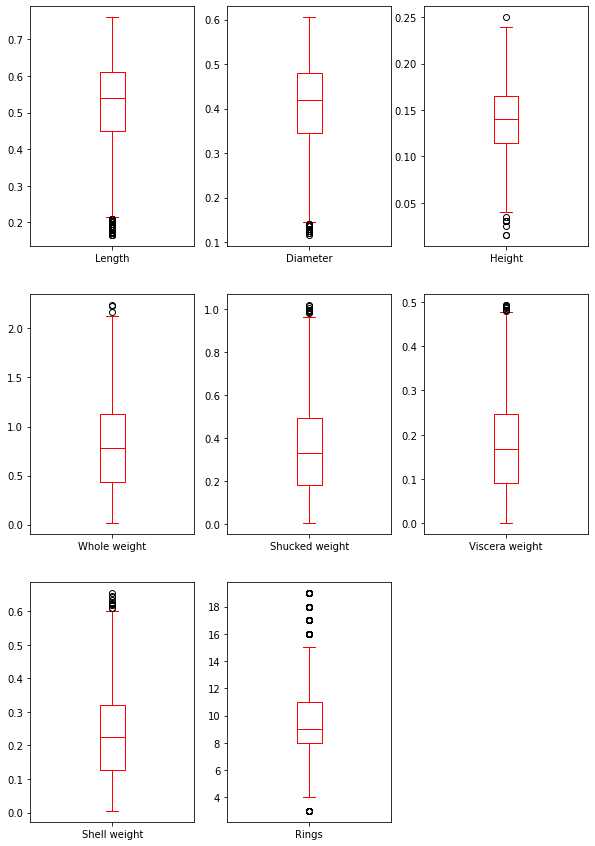

In [43]:
x.plot(kind='box',subplots=True,color = 'red',layout=(3,3),figsize=(10,15))

In [44]:
from scipy import stats
Q1 =x.quantile(q=.25)
Q3 = x.quantile(q=.75)
IQR = x.apply(stats.iqr)

# only keep rows in dataframe that have values within 1.5*IQR of Q1 and Q3

df1 = x[~((df_new < (Q1-1.5*IQR)) | (x > (Q3+1.5*IQR))).any(axis=1)]

# find how many rows are left in the dataframe 

df1.shape

(3770, 8)

In [45]:
loss_percent1 =(4177-3770)/3770*100
print(loss_percent1)

10.795755968169761


Length               AxesSubplot(0.125,0.657941;0.227941x0.222059)
Diameter          AxesSubplot(0.398529,0.657941;0.227941x0.222059)
Height            AxesSubplot(0.672059,0.657941;0.227941x0.222059)
Whole weight         AxesSubplot(0.125,0.391471;0.227941x0.222059)
Shucked weight    AxesSubplot(0.398529,0.391471;0.227941x0.222059)
Viscera weight    AxesSubplot(0.672059,0.391471;0.227941x0.222059)
Shell weight            AxesSubplot(0.125,0.125;0.227941x0.222059)
Rings                AxesSubplot(0.398529,0.125;0.227941x0.222059)
dtype: object

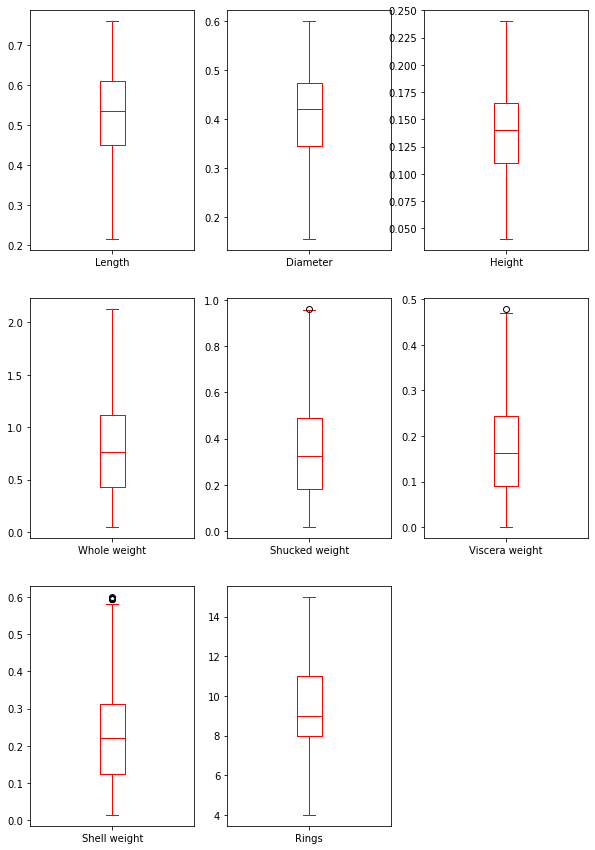

In [46]:
df1.plot(kind='box',subplots=True,color = 'red',layout=(3,3),figsize=(10,15))

# Separate the data

In [47]:
# Here, "x" contains the independent features

x = df_new.iloc[:,:-1]

In [48]:
# Here, "y" will contain the target variable

y = df_new.iloc[:,-1]

# Transforming data to remove skewness

In [49]:
from sklearn.preprocessing import power_transform

In [50]:
x = power_transform(x, method='yeo-johnson')

In [51]:
type(x)

numpy.ndarray

In [52]:
x

array([[-0.68445079, -0.54337947, -1.15893308, ..., -0.54086524,
        -0.68803217, -0.58635376],
       [-1.4117394 , -1.40113174, -1.28040611, ..., -1.31131805,
        -1.33285416, -1.33271691],
       [-0.0462191 ,  0.03716259, -0.12830502, ..., -0.36270513,
        -0.24037305, -0.08021413],
       ...,
       [ 0.65112915,  0.70592133,  1.94363286, ...,  0.90189694,
         1.08965131,  0.66363183],
       [ 0.92606411,  0.8377131 ,  0.28606972, ...,  0.92415296,
         0.87642835,  0.57752029],
       [ 1.9719402 ,  1.85550496,  1.62558351, ...,  2.31446634,
         1.73214622,  1.85675543]])

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=45)

In [55]:
x_train.shape

(3141, 7)

In [56]:
y_train.shape

(3141,)

In [57]:
x_test.shape

(886, 7)

In [58]:
y_test.shape

(886,)

<b>Now, let's build the model using Linear Regression.</b>

In [59]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression

In [60]:
lr = LinearRegression()
lr.fit(x_train, y_train)
lr.score(x_train, y_train)
pred_lr = lr.predict(x_test)

In [61]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)
preddt = dt.predict(x_test)

print('Score: ',dt.score(x_train, y_train))
print('r2 score: ', r2_score(y_test, preddt))

Score:  1.0
r2 score:  0.14080012528020058


In [62]:
from sklearn.ensemble import RandomForestRegressor

fr = RandomForestRegressor()
fr.fit(x_train,y_train)
predfr = fr.predict(x_test)

print('Score: ',fr.score(x_train,y_train))
print('r2 score: ', r2_score(y_test,predfr))

Score:  0.9320949769462357
r2 score:  0.5676282958052733


In [63]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(x_train,y_train)
preds = svr.predict(x_test)

print('Score: ',svr.score(x_train,y_train))
print('r2 score: ', r2_score(y_test,preds))

Score:  0.5297636992797481
r2 score:  0.5770200363476949


In [64]:
# Regularization

from sklearn.linear_model import Lasso

ls = Lasso()
ls.fit(x_train,y_train)
predls = ls.predict(x_test)

print('Score: ',ls.score(x_train,y_train))
print('r2 score: ', r2_score(y_test,predls))

Score:  0.27035245166458777
r2 score:  0.2886996004750645


# Hyper parameter tuning

In [65]:
from sklearn.model_selection import GridSearchCV

parfr = {'criterion' : ["mse", "mae"], 'max_features':['auto','sqrt','log2']}
gcvfr = GridSearchCV(fr, parfr, cv=5) 
gcvfr.fit(x_train, y_train)
gcvfr.best_params_

{'criterion': 'mse', 'max_features': 'log2'}

In [66]:
parsvr = {'kernel' : ["linear", "poly",'rbf'], 'gamma':['auto','scale']}
gcvsvr = GridSearchCV(svr, parsvr, cv=5) 
gcvsvr.fit(x_train, y_train)
gcvsvr.best_params_

{'gamma': 'scale', 'kernel': 'rbf'}

In [67]:
parls = {'alpha' : [0.0001, 0.001, 0.01, 0.1, 1]}
gcvls = GridSearchCV(ls, parls, cv=5) 
gcvls.fit(x_train, y_train)
gcvls.best_params_

{'alpha': 0.001}

<b>Now let's find out the best perfoming model.</b>

In [68]:
model1 = RandomForestRegressor(criterion='mse', max_features='log2', random_state=45)
model1.fit(x_train, y_train)
pred1 = model1.predict(x_test)
print('Score: ',model1.score(x_train, y_train))
print('r2 score: ', r2_score(y_test, pred1))

Score:  0.9342415697826799
r2 score:  0.5795116480586369


In [69]:
model2 = Lasso(alpha=0.001, random_state=45)
model2.fit(x_train, y_train)
pred2 = model2.predict(x_test)
print('Score: ',model2.score(x_train, y_train))
print('r2 score: ', r2_score(y_test, pred2))

Score:  0.5018697971904857
r2 score:  0.5459698338744341


In [70]:
model3 = SVR(kernel='rbf', gamma='scale')
model3.fit(x_train, y_train)
pred3 = model3.predict(x_test)
print('Score: ',model3.score(x_train,y_train))
print('r2 score: ', r2_score(y_test,pred3))

Score:  0.5297636992797481
r2 score:  0.5770200363476949


In [71]:
# Let's print the errors

print('Mean absolute error:', mean_absolute_error(y_test, pred1))
print('Mean squared error:', mean_squared_error(y_test, pred1))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test, pred1)))

Mean absolute error: 1.4156207674943566
Mean squared error: 3.571038826185102
Root mean squared error: 1.8897192453338412


# Model Saving

In [72]:
import joblib

joblib.dump(model1,'Abalone.pkl')
loadmodel = joblib.load('Abalone.pkl')

In [73]:
import numpy as np

a = np.array(y_test)
predicted = np.array(loadmodel.predict(x_test))
df = pd.DataFrame(zip(a,predicted), columns = ["Original","Predicted"])
df

,Original,Predicted
0,9,8.89
1,7,10.70
2,4,4.71
3,10,9.54
4,18,14.29
...,...,...
881,4,5.25
882,6,6.60
883,12,8.71
884,13,10.90
